# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv', index_col = 0)
test = pd.read_csv('data/test.csv', index_col = 0)
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [5]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [6]:
# train_feature.groupby('occyp_type').count().sort_values('gender', ascending = False)

In [7]:
def pre_processing(df_copy):
    df = df_copy.copy()
    df['gender'] = df['gender'].map(lambda x: 1 if x == 'M' else 0)
    df['car'] = df['car'].map(lambda x: 1 if x == 'Y' else 0)
    df['reality'] = df['reality'].map(lambda x: 1 if x == 'Y' else 0)

    df['age'] = (df['DAYS_BIRTH'].abs())/365
    df['age'] = df['age'].astype(int)

    df['work_year'] = (-df['DAYS_EMPLOYED'])/365
    df.loc[df['work_year'] < 0, 'work_year'] = 0
    df['work_year'] = df['work_year'].apply(np.ceil).astype(int)

    df['use_month'] = df['begin_month'].abs()
    df['use_month'] = df['use_month'].astype(int)

    df['family_size'] = df['family_size'].astype(int)
    # df['credit'] = df['credit'].astype(int)

    df.loc[df['work_year'] == 0, 'occyp_type'] = 'Unoccupied'
    df['occyp_type'].fillna('Laborers')

    return df

In [ ]:
def target_

In [8]:
train_feature = pre_processing(train.copy())
test_proccessed = pre_processing(test.copy())

feature = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'child_num', 'family_size', 'age', 'work_year', 'use_month', 'income_total']
target = ['credit']

X_train = train_feature[feature]
y_train = train_feature[target]
train = pd.concat([X_train, y_train], axis = 1)

X_test = test_proccessed[feature]

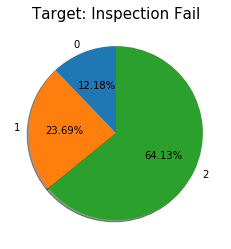

(3222, 6267, 16968)

In [9]:
def analysis_on_target(df):
    """
    n_zero_label, n_one_label에
    각각 label이 0인 데이터의 수, label이 1인 데이터의 수를 담아 반환하세요.
    """
    n_zero_label, n_one_label, n_two_label = -1, -1, -1

    # YOUR CODE HERE
    n_two_label = sum(df['credit'] == 2)
    n_one_label = sum(df['credit'] == 1)
    n_zero_label = sum(df['credit'] == 0)

    
    # YOUR CODE ENDS HERE

    plt.pie(
        (n_zero_label, n_one_label, n_two_label),
        labels=(0, 1, 2),
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target: Inspection Fail", size=15)
    plt.show()

    return n_zero_label, n_one_label, n_two_label
analysis_on_target(y_train)

In [10]:
train.corr()

,gender,car,reality,child_num,family_size,age,work_year,use_month,income_total,credit
gender,1.000000,0.362320,-0.048927,0.076731,0.111060,-0.200988,-0.028642,-0.007707,0.198455,0.001562
car,0.362320,1.000000,-0.016599,0.101846,0.149463,-0.156431,0.008034,0.029955,0.213432,0.007761
reality,-0.048927,-0.016599,1.000000,0.000435,-0.006667,0.129745,-0.040964,-0.003863,0.035377,-0.009387
child_num,0.076731,0.101846,0.000435,1.000000,0.890530,-0.332831,0.049190,0.007229,0.032186,0.004081
family_size,0.111060,0.149463,-0.006667,0.890530,1.000000,-0.298081,0.061249,0.023032,0.023839,0.008227
age,-0.200988,-0.156431,0.129745,-0.332831,-0.298081,1.000000,-0.038275,0.057365,-0.064009,0.025059
work_year,-0.028642,0.008034,-0.040964,0.049190,0.061249,-0.038275,1.000000,0.081747,0.090016,0.023553
use_month,-0.007707,0.029955,-0.003863,0.007229,0.023032,0.057365,0.081747,1.000000,0.018047,0.147477
income_total,0.198455,0.213432,0.035377,0.032186,0.023839,-0.064009,0.090016,0.018047,1.000000,0.008555
credit,0.001562,0.007761,-0.009387,0.004081,0.008227,0.025059,0.023553,0.147477,0.008555,1.000000


In [11]:
train.to_csv('data/train_clean.csv')
X_test.to_csv('data/test_clean.csv')